In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [2]:
# Training data
X_train = np.array([1, 3, 4, 5, 6]).reshape(-1, 1)
y_train = np.array([169000, 750000, 863000, 1873000, 2050000])

# Test data
X_test = np.array([7, 8, 9, 10]).reshape(-1, 1)


In [3]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [4]:
# Make predictions using the test data
y_pred = model.predict(X_test)
print("Predicted values:", y_pred)


Predicted values: [2407378.37837838 2803121.62162162 3198864.86486486 3594608.10810811]


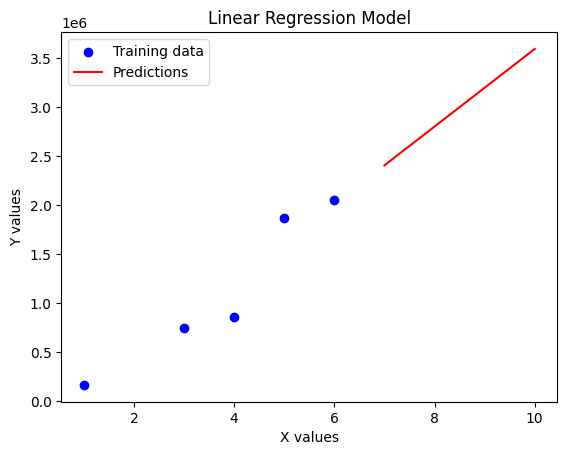

In [5]:
# Plot the training data and the predictions
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_test, y_pred, color='red', label='Predictions')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear Regression Model')
plt.legend()
plt.show()


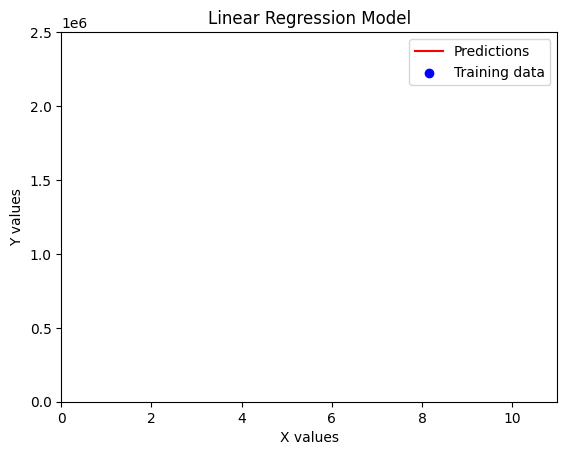

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression

# Training data
X_train = np.array([1, 3, 4, 5, 6]).reshape(-1, 1)
y_train = np.array([169000, 750000, 863000, 1873000, 2050000])

# Test data
X_test = np.array([7, 8, 9, 10]).reshape(-1, 1)

# Create and train the model
model = LinearRegression()

# Initialize the plot
fig, ax = plt.subplots()
line, = ax.plot([], [], 'r-', label='Predictions')
scatter = ax.scatter([], [], color='blue', label='Training data')
ax.set_xlim(0, 11)
ax.set_ylim(0, 2500000)
ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.set_title('Linear Regression Model')
ax.legend()

# Function to initialize the plot
def init():
    line.set_data([], [])
    scatter.set_offsets(np.empty((0, 2)))
    return line, scatter

# Function to update the plot
def update(frame):
    # Fit the model with data up to the current frame
    model.fit(X_train[:frame+1], y_train[:frame+1])
    # Predict for both training and test data
    y_pred = model.predict(np.concatenate((X_train[:frame+1], X_test)))
    
    # Update the line data
    line.set_data(np.concatenate((X_train[:frame+1], X_test)), y_pred)
    # Update the scatter data
    scatter.set_offsets(np.c_[X_train[:frame+1], y_train[:frame+1]])
    
    return line, scatter

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(X_train)), init_func=init, blit=True, repeat=False)

plt.show()
